## Import
***
Importing libraries that will be used in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

## Data Preparation
***
The data is available in (."h5") format.

### Function for loading the dataset:

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File('./datasets/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

Analyzing the data shape:

In [3]:
train_x, train_y, test_x, test_y, classes = load_dataset()
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))

print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (209, 64, 64, 3)
Train Y shape: (1, 209)
Test X shape: (50, 64, 64, 3)
Test Y shape: (1, 50)


Visualizing an image:

cat


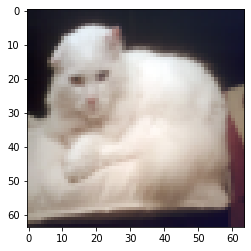

In [4]:
# change index for another image
index = 13
plt.imshow(train_x[index])
if train_y[0,index] == 1:
    print("cat")
else:
    print("non-cat")

In [5]:
train_y.shape

(1, 209)

Flattening the image and seeing its shape afterwards:

In [6]:
train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T

print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


Standardizing the image:

In [7]:
train_x = train_x/255.
test_x = test_x/255.

## Activation Function
***

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## Initializing Parameters
***

In [9]:
def initialize_parameters(dim):
    w = np.random.randn(dim, 1)*0.01
    b = 0
    return w, b

## Foward and Back Propagation
***

In [18]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    #calculate activation function
    A = sigmoid(np.dot(w.T, X)+b)
    
    #find the cost
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  

    #find gradient (back propagation)
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db} 
    
   
    return grads, cost

## Optimization
***

In [11]:
def gradient_descent(w, b, X, Y, iterations, learning_rate):
    costs = []
    for i in range(iterations):
        grads, cost = propagate(w, b, X, Y)
        
        #update parameters
        w = w - learning_rate * grads["dw"]
        b = b - learning_rate * grads["db"]
        costs.append(cost)
        if i % 200 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}    
    return params, costs

## Final Model
***

In [12]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [13]:
def model(train_x, train_y, test_x, test_y, iterations, learning_rate):
    w, b = initialize_parameters(train_x.shape[0])
    parameters, costs = gradient_descent(w, b, train_x, train_y, iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # predict 
    test_pred_y = predict(w, b, test_x)
    train_pred_y = predict(w, b, train_x)

    print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
    print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))
    
    return costs

## Training and predicting
***

In [14]:
lr = 0.005
costs = model(train_x, train_y, test_x, test_y, iterations = 1000, learning_rate = lr)

Cost after iteration 0: 0.662158
Cost after iteration 200: 0.483544
Cost after iteration 400: 0.332229
Cost after iteration 600: 0.280504
Cost after iteration 800: 0.243511
Train Acc: 96.65071770334929 %
Test Acc: 70.0 %


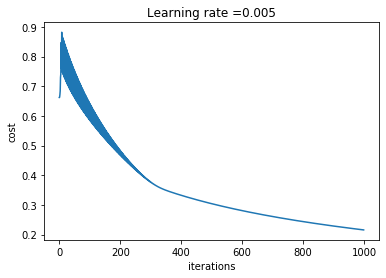

In [15]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(lr))
plt.show()

In [16]:
lr = 0.00002
costs = model(train_x, train_y, test_x, test_y, iterations = 3000, learning_rate = lr)

Cost after iteration 0: 0.691170
Cost after iteration 200: 0.656380
Cost after iteration 400: 0.651906
Cost after iteration 600: 0.648099
Cost after iteration 800: 0.644475
Cost after iteration 1000: 0.641010
Cost after iteration 1200: 0.637693
Cost after iteration 1400: 0.634513
Cost after iteration 1600: 0.631458
Cost after iteration 1800: 0.628521
Cost after iteration 2000: 0.625692
Cost after iteration 2200: 0.622964
Cost after iteration 2400: 0.620330
Cost after iteration 2600: 0.617782
Cost after iteration 2800: 0.615315
Train Acc: 65.55023923444976 %
Test Acc: 32.0 %


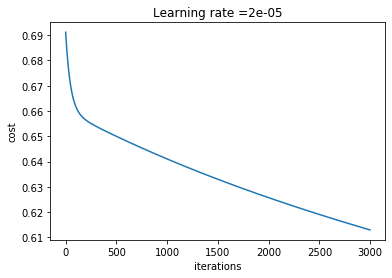

In [17]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(lr))
plt.show()